# Линейная регрессия


## Мотивация

Почему мы изучаем линеную регрессию?
- широко используема
- легко использовать (не нужно тюнить много параметров)
- относительно легко интерпретируема
- является базой для понимания более сложных алгоритмов

## Библиотеки

Мы познакомимся с двумя библиотеками: [Statsmodels](http://statsmodels.sourceforge.net/) и [scikit-learn](http://scikit-learn.org/stable/). Первая будет полезна вам для эконометрики и интерпретации моделей, вторая это в целом более популярная библиотека для машинного обучения, которая предлагает множество других методов помимо линейной регресии.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Мы рассмотрим Advertising Dataset


In [10]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Что такое **признаки / регрессоры / независимые переменные / "фичи" / факторы**?
- TV: доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- Radio: доллары, потраченные на радио рекламу
- Newspaper: доллары, потраченные на рекламу в газетах

Что такое **таргет / зависимая переменная**?
- Sales: продажи одного продукта на данном рынке (в тысячах)

In [11]:
# print the shape of the DataFrame
data.shape

(200, 4)

В нашей выборке мы имеем 200 **наблюдений / "семплов"** (200 рынков в наборе данных)

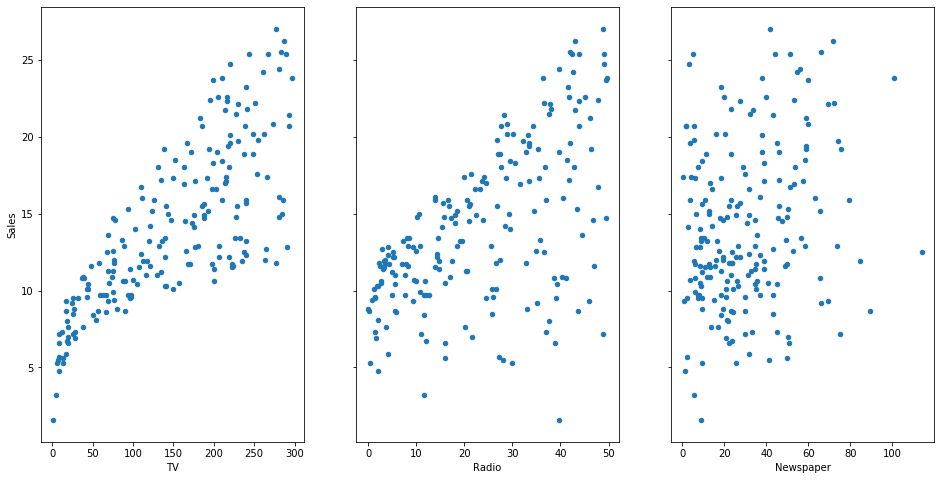

In [12]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

## Вопросы на которые мы обычно хотим знать ответы

Давайте представим, что вы работаете на компанию, которая производит и продает этот товар. Компания может задать вам следующий вопрос: на основании этих данных, как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:
1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке,можем ли мы предсказать продажи?


## Одномерная линейная регрессия

Простая линейная регрессия - это подход к прогнозированию **количественной переменной** с использованием **одного признака**:

$y = \beta_0 + \beta_1x$

- $y$ это таргет
- $x$ это признак
- $\beta_0$ это свободный член
- $\beta_1$ это коэффициент при признаке x

Вместе $\beta_0$ and $\beta_1$ называются **коэффициентами модели**. Чтобы создать свою модель, вы должны "выучить" значения этих коэффициентов. И как только мы "выучим" эти коэффициенты, мы сможем использовать модель для прогнозирования продаж!

## Оценка ("обучение") коэффициентов модели


Вообще говоря, коэффициенты оцениваются с использованием **критерия наименьших квадратов**, что означает, что мы находим линию (математически), которая минимизирует **сумму квадратов остатков** (или «сумму квадратов ошибок»):

<img src="images/08_estimating_coefficients.png">

Что изображено на схеме?
- Черные точки - это **наблюдаемые значения** x и y.
- Синяя линия - это наша **линия полученная при минимизации квадратов ошибок**.
- Красные линии - это **остатки**, которые представляют собой расстояния между наблюдаемыми значениями и линией наименьших квадратов.

Как коэффициенты модели соотносятся с линией наименьших квадратов?
- $ \ beta_0 $ - это **точка пересечения** (значение $ y $, когда $ x $ = 0)
- $ \ beta_1 $ - это **наклон** (изменение $ y $, деленное на изменение $ x $)

Вот графическое изображение этих вычислений:

<img src="images/08_slope_intercept.png">

Давайте попробуем использовать **Statsmodels** для оценки коэффициентов модели на наших данных

In [13]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Интерпретация коэффициентов модели

Как мы интерпретируем TV коэффициент ($\beta_1$)?
- Дополнительные 1000 долларов, потраченные на телевизионную рекламу, увеличивают продажы на 47,537 товаров.

Обратите внимание, что если бы увеличение расходов на телевизионную рекламу было связано с **снижением** продаж, $\beta_1$ был бы **отрицательным**.

## Использование модели для прогнозирования

Допустим, появился новый рынок, на котором расходы на телевизионную рекламу составили **$50,000**. Что бы мы спрогнозировали для продаж на этом рынке?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [14]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Таким образом, мы могли бы предсказать продажи **9409 товаров** на этом рынке.

Конечно, мы также можем использовать Statsmodels  для прогнозирования:

In [15]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [16]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Построение линии наименьших квадратов

Давайте сделаем прогнозы для **наименьших и наибольших наблюдаемых значений x**, а затем используем предсказанные значения для построения линии наименьших квадратов:

In [17]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [18]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

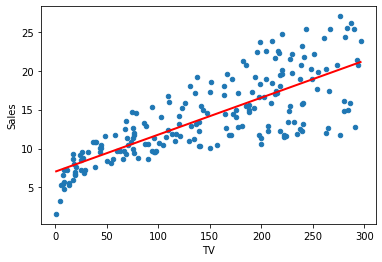

In [20]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

## Насколько хорошо модель соответствует данным?

Одним из способом оценки качества линейной модели является значение **R-квадрат**. R-квадрат-это **это доля объяснённой суммы квадратов в общей**:

![](https://miro.medium.com/max/2812/1*JwEiZQSkL4I710994WaY4w.png)

Чем выше R-квадрат, тем лучше, потому что это означает, что большая дисперсия объясняется моделью. Вот пример того, как выглядит R-квадрат":

<img src="images/08_r_squared.png">

Вы можете видеть, что **синяя линия** объясняет некоторую дисперсию в данных (R-квадрат=0,54), **зеленая линия** объясняет большую часть дисперсии (R-квадрат=0,64), а **красная линия** еще больше подходит к данным обучения (R-квадрат=0,66). (Красная линия выглядит так, как будто она **слишком сильно подстраивается**?)

Давайте вычислим значение R-квадрата для нашей простой линейной модели:

In [21]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Является ли это "хорошим" значением R-квадрата? Трудно сказать. Порог для хорошего значения R-квадрата широко зависит от области. Поэтому он наиболее полезен в качестве инструмента для **сравнения различных моделей**.

## Множественная линейная регрессия

Простая линейная регрессия может быть легко расширена для включения нескольких объектов. Это называется **множественной линейной регрессией** (вообще, когда говорят о линейной регрессии подразумевают именно ее):

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Каждый $x$ представляет собой отдельный признак и имеет свой собственный коэффициент. В этом случае:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Давайте воспользуемся Statsmodels для оценки этих коэффициентов:

In [22]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

Как мы интерпретируем эти коэффициенты? Для данной суммы расходов на рекламу на радио и в газетах **увеличение расходов на рекламу на телевидении на 1000 долларов увеличивает продажы на 45,765**.


## Несколько слов про значимость полученных результатов

Вы должны понимать, что **коэффициенты полученные вами это случайные величины**. В примере выше, например, можно сказать, что **реклама в газетах уменьшает количество проданного товара**, тк коэффициент перед сооствествующим коэффициентом отрицательный. Однако, из-за того, что коэффициент маленький **так могло произойти случайно**. Чтобы оценить это вам понадобяться знания, которые вы получите позже :) Однако, даже сейчас вы можете посмотреть отчет, который предлагает Statsmodels и сделать "примерные" выводы о значимости каждого коэффициента 

In [23]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        17:02:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Что можно увидеть по результатам выше?

- Расходы на рекламу на телевидении и радио **положительно связаны** с продажами, в то время как расходы на рекламу в газетах **незначимо отрицательно связаны** с продажами.
- Эта модель имеет более высокий **R-квадрат** (0,897), чем предыдущая модель, что означает, что эта модель обеспечивает лучшее соответствие данным, чем модель, включающая только TV.

## Переобучение (overfitting)


**R-квадрат всегда будет увеличиваться по мере добавления новых признаков в модель**, даже если они не связаны с таргетом. Таким образом, выбор модели с наибольшим R-квадратом не является надежным подходом для выбора наилучшей линейной модели.


![](https://miro.medium.com/max/875/1*_7OPgojau8hkiPUiHoGK_w.png)

In [33]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [34]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

In [37]:
data["Random"] = np.random.normal(0, 1, data.shape[0])

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Random', data=data).fit()
lm.rsquared

0.8972907570941141

Что делать? **Тестировать на независимой выборке**! Этим мы займемся на следующем семинаре, а сейчас scikit-learn!

## Линейная регрессия в scikit-learn


In [44]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [45]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820448),
 ('Newspaper', -0.0010374930424763285)]

In [49]:
# predict for a new observation
lm.predict(np.array([[100, 25, 25]]))

array([12.20266701])

In [50]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521

Заметьте, что **scikit-learn предоставляет сильно меньше информации** по сравнению с Statsmodels

## Обработка категориальных предикторов с двумя категориями

До сих пор все наши предсказатели были числовыми. Что, если один из наших предсказателей был категориальным?

Давайте создадим новый бинарный признак под названием **Size** с двумя возможными значениями: **маленький или большой**:

In [51]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Random,Size
1,230.1,37.8,69.2,22.1,0.049770,large
2,44.5,39.3,45.1,10.4,0.298244,small
3,17.2,45.9,69.3,9.3,-1.071444,small
4,151.5,41.3,58.5,18.5,-0.778989,small
5,180.8,10.8,58.4,12.9,-1.162397,large


Для scikit-learn нам нужно представить все данные **в числовом формате**. Если функция имеет только две категории, мы можем просто создать **фиктивную переменную**, которая представляет категории как бинарное значение:

In [52]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge
1,230.1,37.8,69.2,22.1,0.049770,large,1
2,44.5,39.3,45.1,10.4,0.298244,small,0
3,17.2,45.9,69.3,9.3,-1.071444,small,0
4,151.5,41.3,58.5,18.5,-0.778989,small,0
5,180.8,10.8,58.4,12.9,-1.162397,large,1


In [54]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04571982092436277),
 ('Radio', 0.1887281431342785),
 ('Newspaper', -0.001097679448351624),
 ('IsLarge', 0.05742385085482783)]

Как мы интерпретируем **IsLarge коэффициент**? Для данного объема расходов на рекламу на телевидении/радио/в газетах наличие большого рынка связано со средним **увеличением** продаж на 57,42 (по сравнению с небольшим рынком, который называется **базовым значением**).

Если бы мы изменили кодировку 0/1 и вместо этого создали признак "IsSmall"? Коэффициент будет тем же самым, за исключением того, что он будет отрицательным, а не положительным.

## Обработка категориальных предикторов с более чем двумя категориями

Давайте создадим новый признак под названием **Area** и случайным образом назначим наблюдения **rural, suburban, или urban**:

In [55]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,0.049770,large,1,rural
2,44.5,39.3,45.1,10.4,0.298244,small,0,urban
3,17.2,45.9,69.3,9.3,-1.071444,small,0,rural
4,151.5,41.3,58.5,18.5,-0.778989,small,0,urban
5,180.8,10.8,58.4,12.9,-1.162397,large,1,suburban


Мы должны представлять область численно, но мы не можем просто кодировать ее как 0=Сельская, 1=Пригородная, 2=городская, потому что это означало бы упорядоченное отношение между пригородом и городом (и, таким образом, город каким-то образом "дважды" является пригородной категорией).

Вместо этого мы создаем **еще одну фиктивную переменную**:

In [56]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Random,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,0.049770,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,0.298244,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,-1.071444,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,-0.778989,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,-1.162397,large,1,suburban,1,0


Вот как мы интерпретируем кодировку:
- **сельский** кодируется как Area_suburban=0 и Area_urban=0
- **suburban** кодируется как Area_suburban=1 и Area_urban=0
- **urban** кодируется как Area_suburban=0 и Area_urban=1

Почему нам нужны только **две фиктивные переменные, а не три?** потому что две дамми переменные захватывают всю информацию об признаке Area и неявно определяют сельскую местность как базовое значение. (В общем случае, если у вас есть категориальный признак с k уровнями, вы создаете фиктивные переменные k-1.)

Если это сбивает с толку, подумайте о том, почему нам нужна только одна фиктивная Переменная для размера (IsLarge), а не две фиктивные переменные (IsSmall и IsLarge).

Давайте включим в модель две новые фиктивные переменные:

In [58]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('TV', 0.04574401036331374),
 ('Radio', 0.18786669552525798),
 ('Newspaper', -0.0010876977267109122),
 ('IsLarge', 0.07739660749747915),
 ('Area_suburban', -0.10656299015958612),
 ('Area_urban', 0.26813802165220074)]

Как мы интерпретируем коэффициенты?
- Если все остальные переменные фиксированны, то быть **пригородным** районом, влечет **снижение** продаж на 106,56  (по сравнению с базовым уровнем, который является сельским).
- Быть **городским** районом связано со средним **увеличением** продаж на 268,13 (по сравнению с сельским районом).

**Заключительное замечание о фиктивном кодировании:** если у вас есть категории, которые можно ранжировать (например, полностью не согласен, не согласен, нейтрален, согласен, полностью согласен), вы можете использовать одну фиктивную переменную и представлять категории численно (например, 1, 2, 3, 4, 5).

## Что мы не рассмотрели?

- Допущения линейной регрессии
- Нелинейные засисимости
- Обнаружение коллинеарности
- И многое другое! Этот ноутбук рассказывает только про самые базовые вещи!


## References

- Этот ноутбук является переводом и адаптацией под наш курс данного ноутбука - https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb


- Визуализация от нашего ассистента :)
https://kawaiiuroboros.github.io/linear-regression/